# Example notebook : Dataset bias analyse for a binary classification

## Load packages

In [1]:
import numpy as np

from transparentai.datasets import StructuredDataset, load_adult
from transparentai.fairness import DatasetBiasMetric

## Load adult dataset

In [2]:
adult = load_adult()

## Prepare and create DatasetBiasMetric

To create a DatasetBiasMetric you need a StructuredDataset object and a privileged_groups dictionnary where is indicate which variable is / are protected and what is the privileged values.

In [3]:
# Transform age to be a categorical variable for protected attributes
adult['age category'] = np.where(adult['age'] < 26, 'Young',
                                 np.where(adult['age'] < 61, 'Adult','Elder'))

In [4]:
target = 'income'
dataset = StructuredDataset(df=adult, target=target)

privileged_groups = {
    'age category': ['Adult'],
    'marital-status': ['Married-civ-spouse','Married-AF-spouse'],
    'race': ['White'],
    'gender': ['Male']
}   
dataset_bias = DatasetBiasMetric(dataset, privileged_groups, favorable_label='>50K')

## Display dataset bias metrics & save to file

In [5]:
dataset_bias.get_bias_metrics()

,,Disparate impact,Statistical parity difference
attr,index,,
age category,>50K,0.257312,-0.222479
marital-status,>50K,0.143299,-0.382106
race,>50K,0.600592,-0.101445
gender,>50K,0.359655,-0.194516


In [6]:
dataset_bias.save_bias_metrics(fname='save/adult_dataset_bias_metrics_binclass.json')

## Plot dataset bias metrics

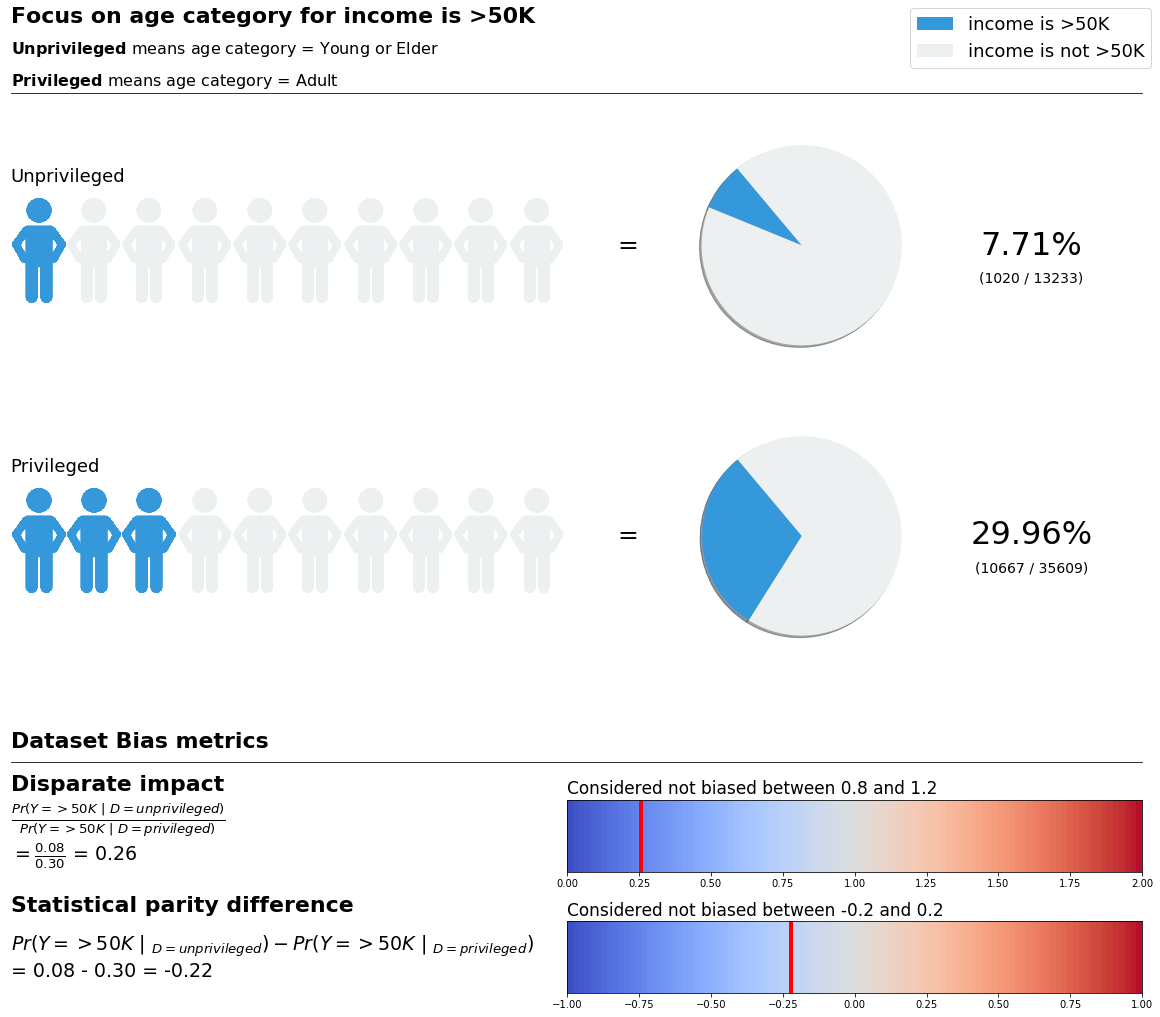

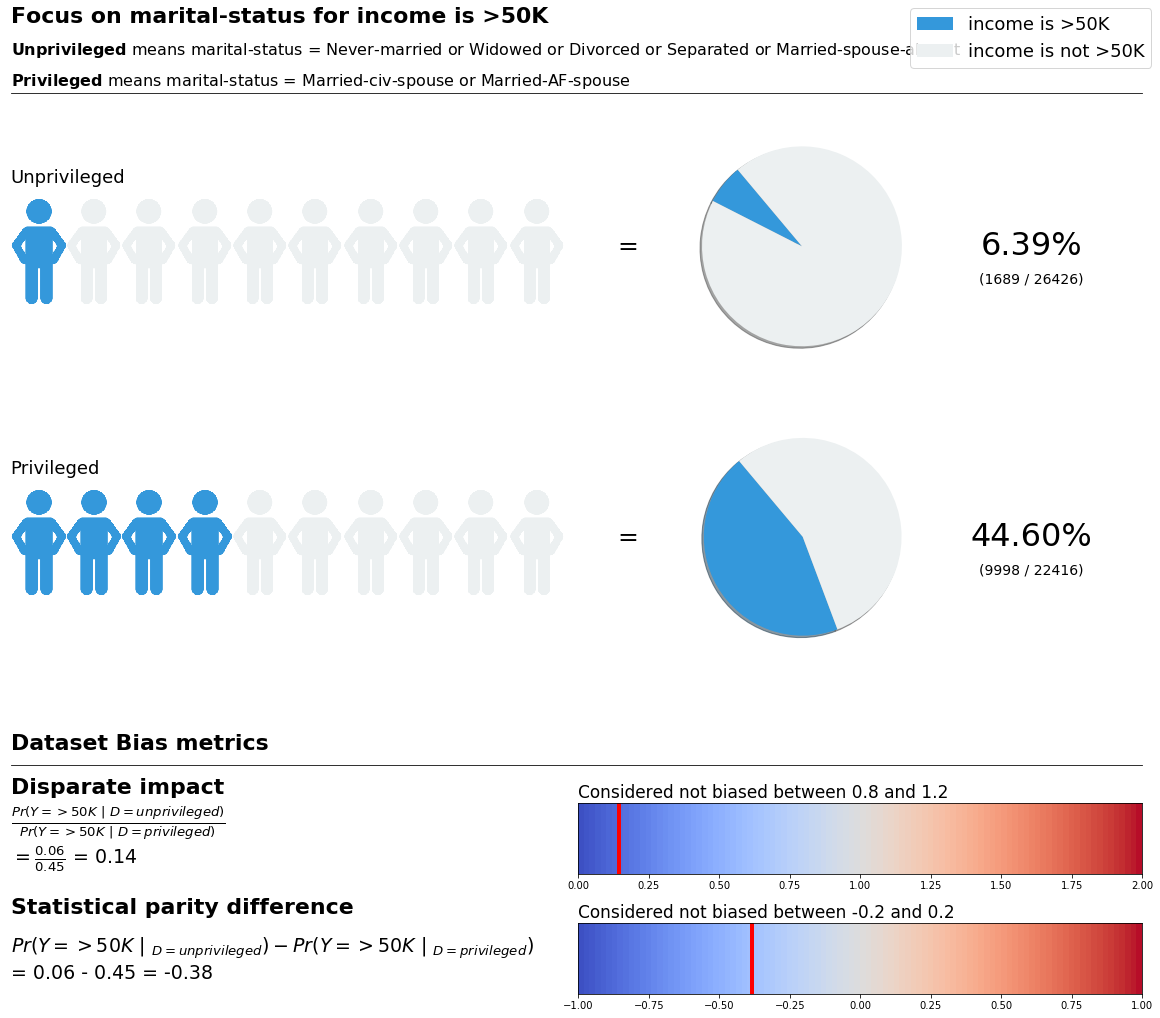

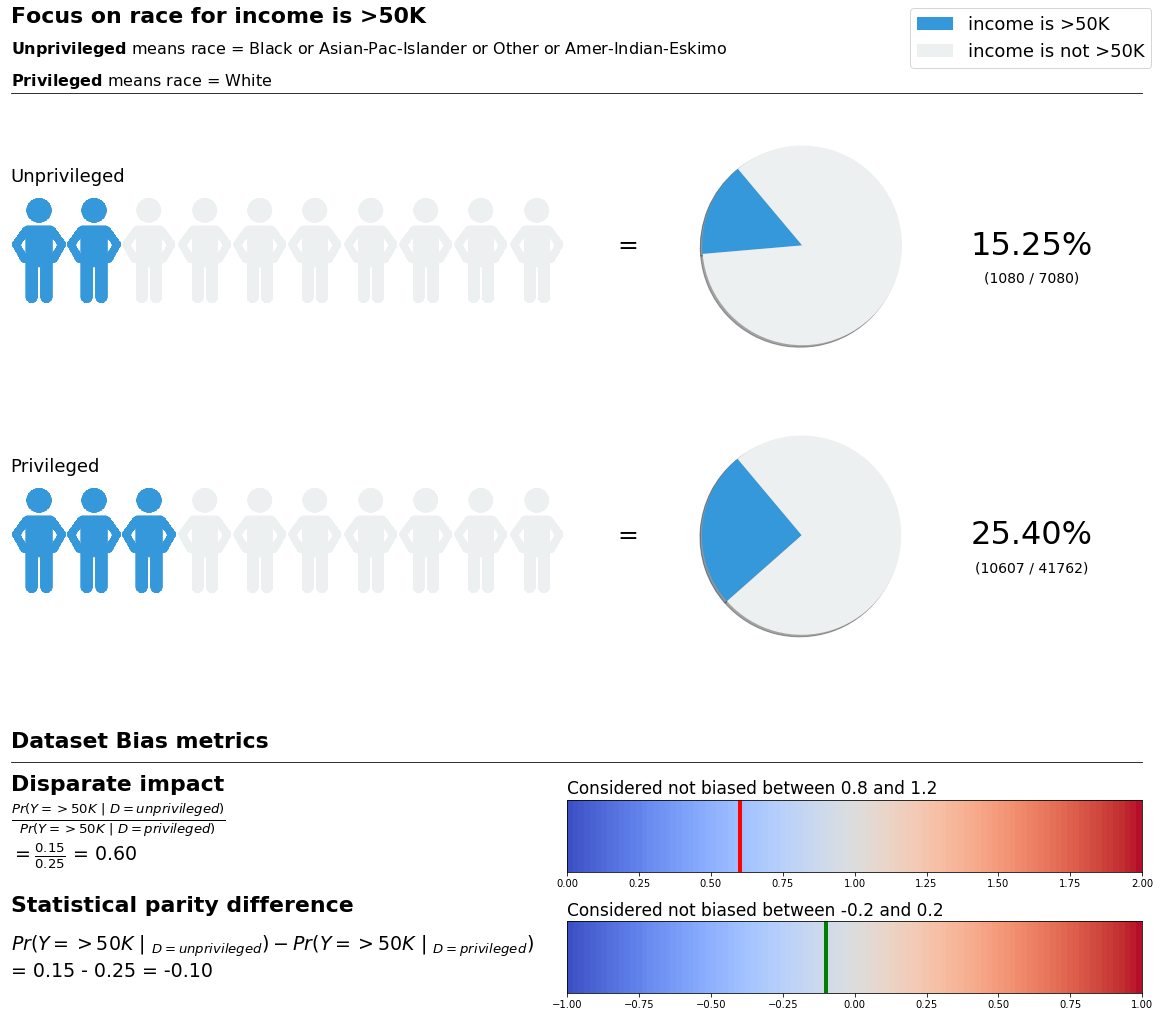

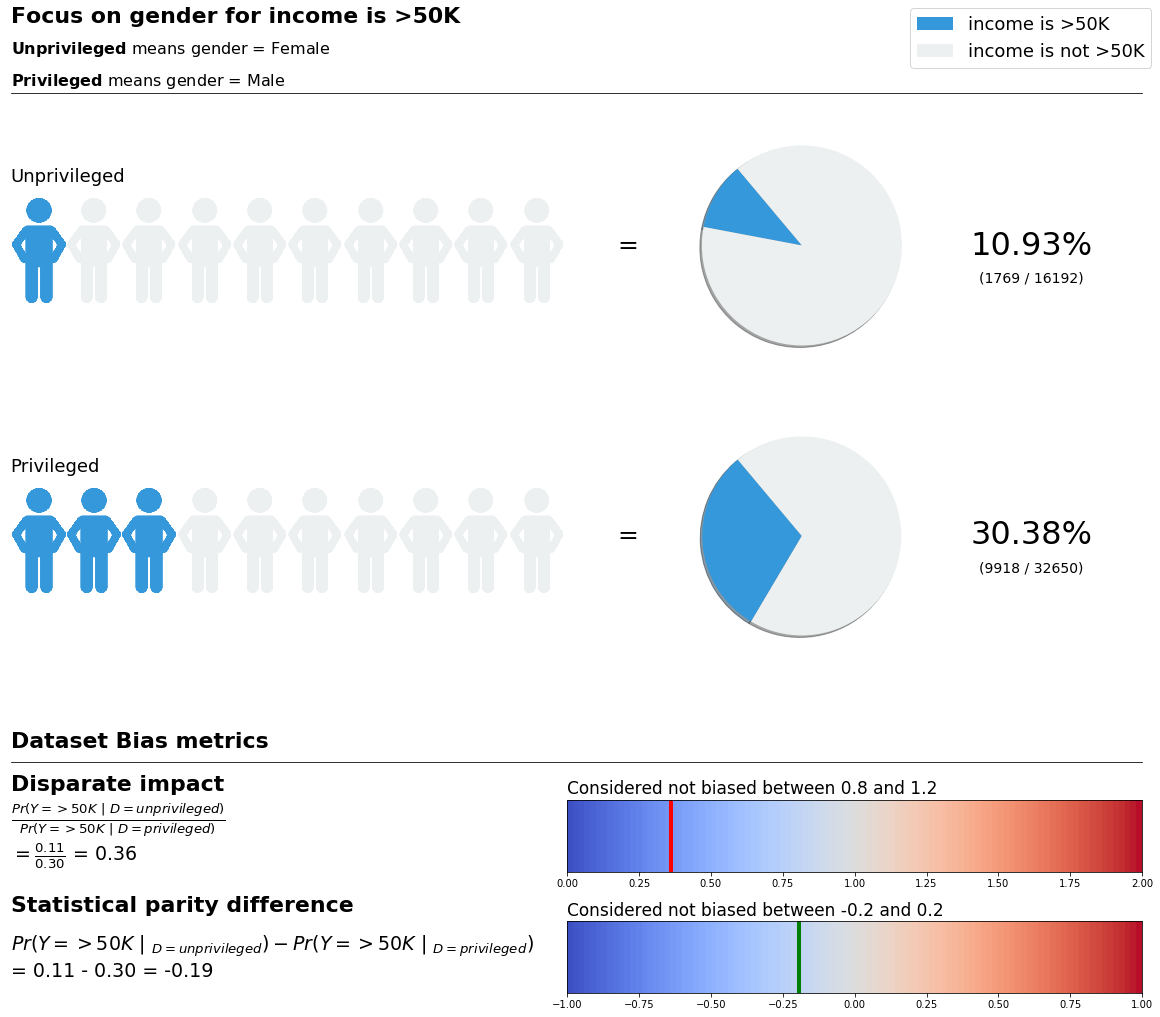

In [7]:
dataset_bias.plot_bias()

## The end.